In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image 

In [3]:
x = list(range(0,10,1))

In [4]:
x

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [5]:
y = np.power(x,1) - 2

In [6]:
y

array([-2, -1,  0,  1,  2,  3,  4,  5,  6,  7])

In [7]:
import matplotlib.pyplot as plt

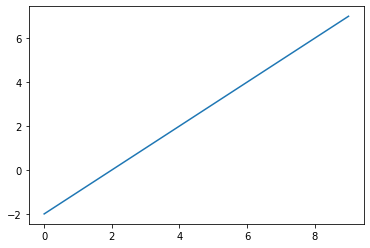

In [8]:
plt.plot(x,y)

In [9]:
y

array([-2, -1,  0,  1,  2,  3,  4,  5,  6,  7])

In [10]:
from sklearn.tree import DecisionTreeRegressor

In [11]:
regressor = DecisionTreeRegressor()

In [12]:
X = np.array(x).reshape(10,1)
y = np.array(y).reshape(10,1)

In [13]:
print(X)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[[-2]
 [-1]
 [ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]]


In [14]:
regressor.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

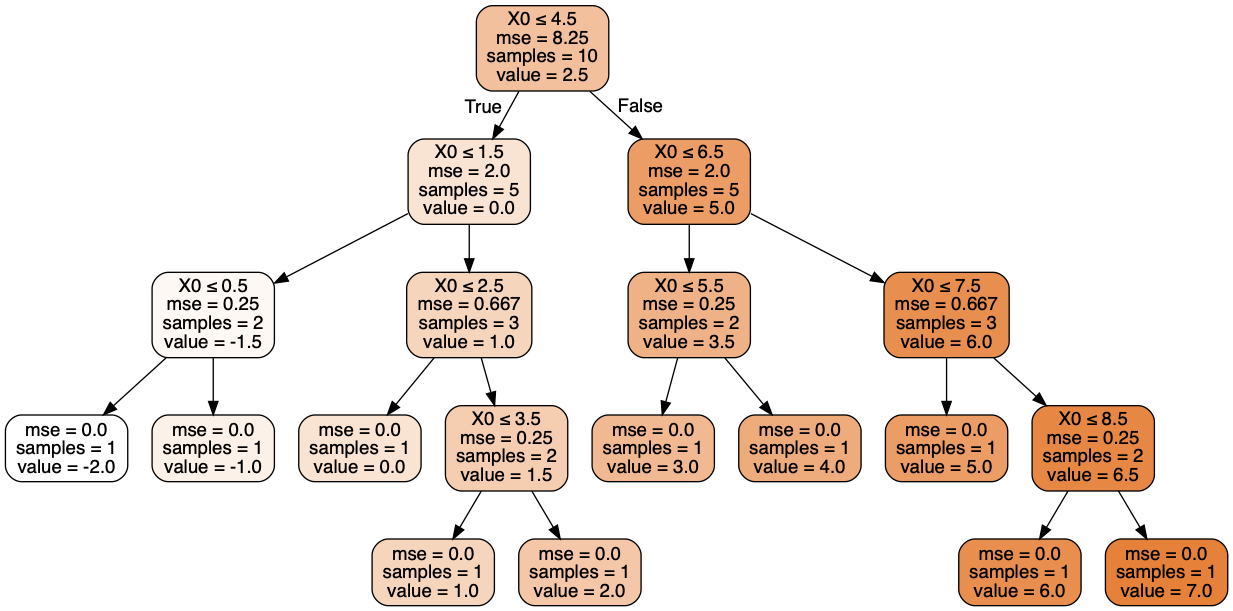

In [15]:
dot_data = StringIO()
export_graphviz(regressor, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [16]:
regressor.tree_.value

array([[[ 2.5]],

       [[ 0. ]],

       [[-1.5]],

       [[-2. ]],

       [[-1. ]],

       [[ 1. ]],

       [[ 0. ]],

       [[ 1.5]],

       [[ 1. ]],

       [[ 2. ]],

       [[ 5. ]],

       [[ 3.5]],

       [[ 3. ]],

       [[ 4. ]],

       [[ 6. ]],

       [[ 5. ]],

       [[ 6.5]],

       [[ 6. ]],

       [[ 7. ]]])

In [17]:
regressor.predict([[44]])

array([7.])

In [18]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

In [19]:
X

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  EstimatedSalary  
0             1               1        101348.88  
1             0               1        112542.58  
2             1               0        113931.57  
3             0               0         93826.63  
4             1               1         79084.10  
...         ...             ...              ...  
9995          1               0         96270.64  
9996          1               1        101699.77  
9997          0               1         42085.58  
9998          1               0         92888.52  
9999          1               0         38190.78  

[10000 rows x 10 columns]

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [21]:
type(X)

pandas.core.frame.DataFrame

In [22]:
X2 = X.apply(LabelEncoder().fit_transform)
X2.head()

CreditScore  Geography  Gender  Age  Tenure  Balance  NumOfProducts  \
0          228          0       0   24       2        0              0   
1          217          2       0   23       1      743              0   
2          111          0       0   24       8     5793              2   
3          308          0       0   21       1        0              1   
4          459          2       0   25       2     3696              0   

   HasCrCard  IsActiveMember  EstimatedSalary  
0          1               1             5068  
1          0               1             5639  
2          1               0             5707  
3          0               0             4704  
4          1               1             3925

In [23]:
X2.iloc[:,1].unique()

array([0, 2, 1])

In [24]:
X4 = pd.get_dummies(X, drop_first=True)
X4.shape

(10000, 11)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X4, y, test_size = 0.2, random_state = 0)

In [26]:
from sklearn.tree import DecisionTreeClassifier



In [27]:
classifier = DecisionTreeClassifier(max_depth=2 , presort=True)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=True, random_state=None,
            splitter='best')

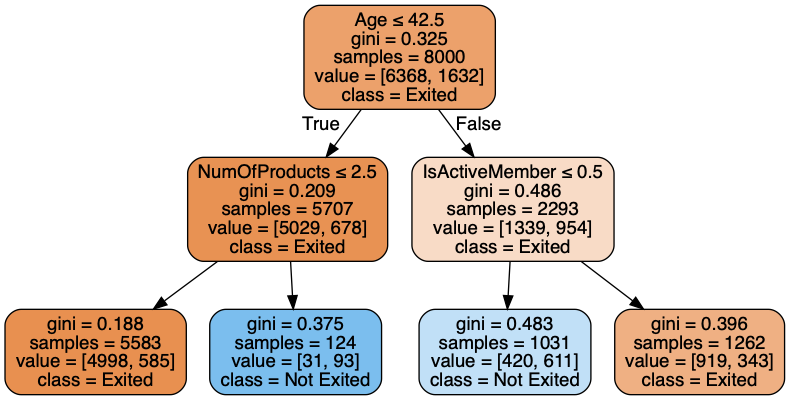

In [28]:
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data,  
                filled=True, rounded=True,feature_names=X_train.columns,class_names=['Exited', 'Not Exited'],
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [29]:
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [30]:
print(cm)

[[1480  115]
 [ 212  193]]


In [31]:
(1480+198)/(1480+198+115+212)

0.8369077306733167

In [32]:
from sklearn.model_selection import GridSearchCV


In [33]:
grid_search = GridSearchCV(classifier, param_grid=[{'max_depth': [2,4,8]}, 
                                                   {'criterion':['gini','entropy']},
                                                  {'min_samples_leaf':[5,10]}])


In [34]:
grid_search.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=True, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'max_depth': [2, 4, 8]}, {'criterion': ['gini', 'entropy']}, {'min_samples_leaf': [5, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
grid_search.best_score_

0.85

In [36]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=True, random_state=None,
            splitter='best')

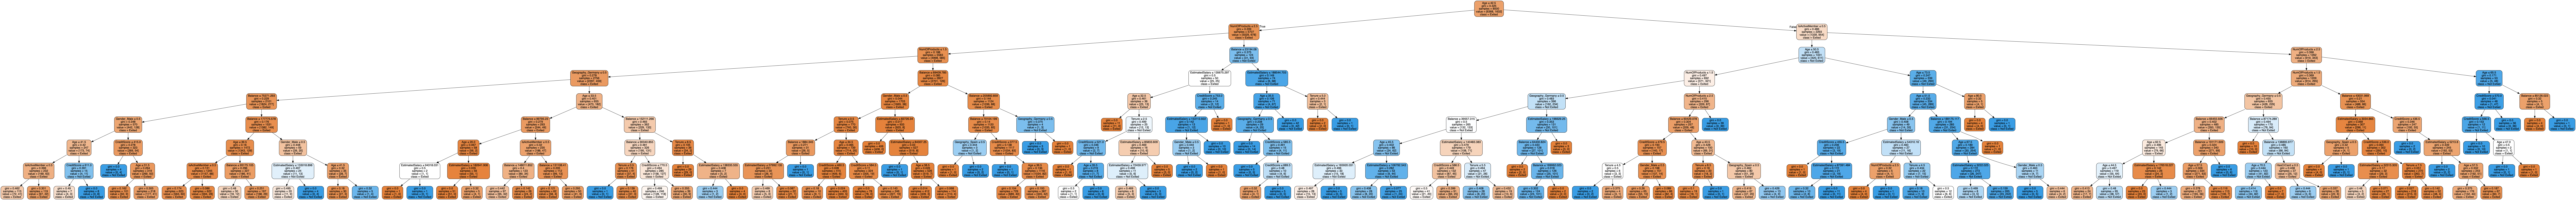

In [37]:
dot_data = StringIO()
export_graphviz(grid_search.best_estimator_, out_file=dot_data,  
                filled=True, rounded=True,feature_names=X_train.columns,class_names=['Exited', 'Not Exited'],
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [38]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)
voting_clf = VotingClassifier(
        estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
        voting='soft'
    )
voting_clf.fit(X_train, y_train)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', RandomFo...bf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=None, voting='soft', weights=None)

In [39]:
from sklearn.metrics import accuracy_score
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


LogisticRegression 0.7895
RandomForestClassifier 0.858
SVC 0.7975


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier 0.8125


In [40]:
from sklearn.ensemble import BaggingClassifier 

In [ ]:
bgCls = BaggingClassifier(DecisionTreeClassifier())